In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simple competing risks example

In [46]:
N = 10000
data = pd.DataFrame({"id": np.arange(N), "sex":np.random.binomial(n=1,p=0.5,size=N)})
data['source'] = 0
data['target'] = np.random.choice(a=[1,2], size=N, p=[0.5,0.5])
data['transition'] = data['target']
data.loc[data['transition']==1,'T'] = 1 + np.round(np.random.exponential(scale=(2), size=np.sum(data['transition']==1)))
data.loc[data['transition']==2,'T'] = 1 + np.round(np.random.exponential(scale=(4), size=np.sum(data['transition']==2)))

data.head()

,id,sex,source,target,transition,T
0,0,0,0,2,2,6.0
1,1,0,0,2,2,8.0
2,2,1,0,1,1,1.0
3,3,1,0,1,1,6.0
4,4,0,0,1,1,4.0


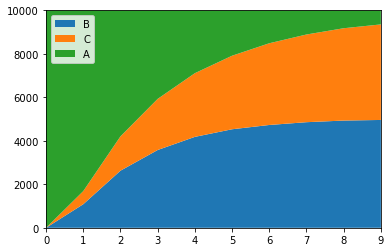

In [49]:
state0 = []
state1 = []
state2 = []
# times = np.arange(data['T'].max(), dtype=int)
times = np.arange(10, dtype=int)

for t in times:
    state0.append((data['T']>t).sum())
    state1.append(((data['transition']==1)&(data['T']<=t)).sum())
    state2.append(((data['transition']==2)&(data['T']<=t)).sum())


fig, ax = plt.subplots()
labels = ['B', 'C', 'A']
ax.stackplot(times, state1, state2, state0, labels=labels)
ax.legend(loc='upper left')
ax.set_xlim(times[0], times[-1])
ax.set_ylim(0, N)

plt.show()
    